In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn. metrics import confusion_matrix,completeness_score,classification_report

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/movies.dat', sep='::', encoding='latin-1',usecols=[0,1,2],
                 names=['moviesid','moviename','category'])
df2 = pd.read_csv('/content/drive/MyDrive/users.dat', sep='::', encoding='latin-1',usecols=[0,1,2,3,4],
                 names=['userid','gender','age','occupation','zip-code'])

df3 = pd.read_csv('/content/drive/MyDrive/ratings.dat', sep='::', encoding='latin-1',usecols=[0,1,2,3],
                 names=['id','movieid','ratings','timestamp'])

<ipython-input-2-193bd708e2b2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv('/content/drive/MyDrive/movies.dat', sep='::', encoding='latin-1',usecols=[0,1,2],
<ipython-input-2-193bd708e2b2>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv('/content/drive/MyDrive/users.dat', sep='::', encoding='latin-1',usecols=[0,1,2,3,4],
<ipython-input-2-193bd708e2b2>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by 

In [ ]:
df3

,id,movieid,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
df=pd.concat([df1,df2,df3],axis=1)

In [ ]:
df.shape

(1000209, 12)

In [ ]:
df

,moviesid,moviename,category,userid,gender,age,occupation,zip-code,id,movieid,ratings,timestamp
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1.0,F,1.0,10.0,48067,1,1193,5,978300760
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2.0,M,56.0,16.0,70072,1,661,3,978302109
2,3.0,Grumpier Old Men (1995),Comedy|Romance,3.0,M,25.0,15.0,55117,1,914,3,978301968
3,4.0,Waiting to Exhale (1995),Comedy|Drama,4.0,M,45.0,7.0,02460,1,3408,4,978300275
4,5.0,Father of the Bride Part II (1995),Comedy,5.0,M,25.0,20.0,55455,1,2355,5,978824291
...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040,1091,1,956716541
1000205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040,1094,5,956704887
1000206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040,562,5,956704746
1000207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040,1096,4,956715648


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   moviesid    3883 non-null     float64
 1   moviename   3883 non-null     object 
 2   category    3883 non-null     object 
 3   userid      6040 non-null     float64
 4   gender      6040 non-null     object 
 5   age         6040 non-null     float64
 6   occupation  6040 non-null     float64
 7   zip-code    6040 non-null     object 
 8   id          1000209 non-null  int64  
 9   movieid     1000209 non-null  int64  
 10  ratings     1000209 non-null  int64  
 11  timestamp   1000209 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 91.6+ MB


In [ ]:
df.columns

Index(['moviesid', 'moviename', 'category', 'userid', 'gender', 'age',
       'occupation', 'zip-code', 'id', 'movieid', 'ratings', 'timestamp'],
      dtype='object')

In [ ]:
df.dtypes

moviesid      float64
moviename      object
category       object
userid        float64
gender         object
age           float64
occupation    float64
zip-code       object
id              int64
movieid         int64
ratings         int64
timestamp       int64
dtype: object

<ipython-input-10-279151728ab9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method = "spearman")


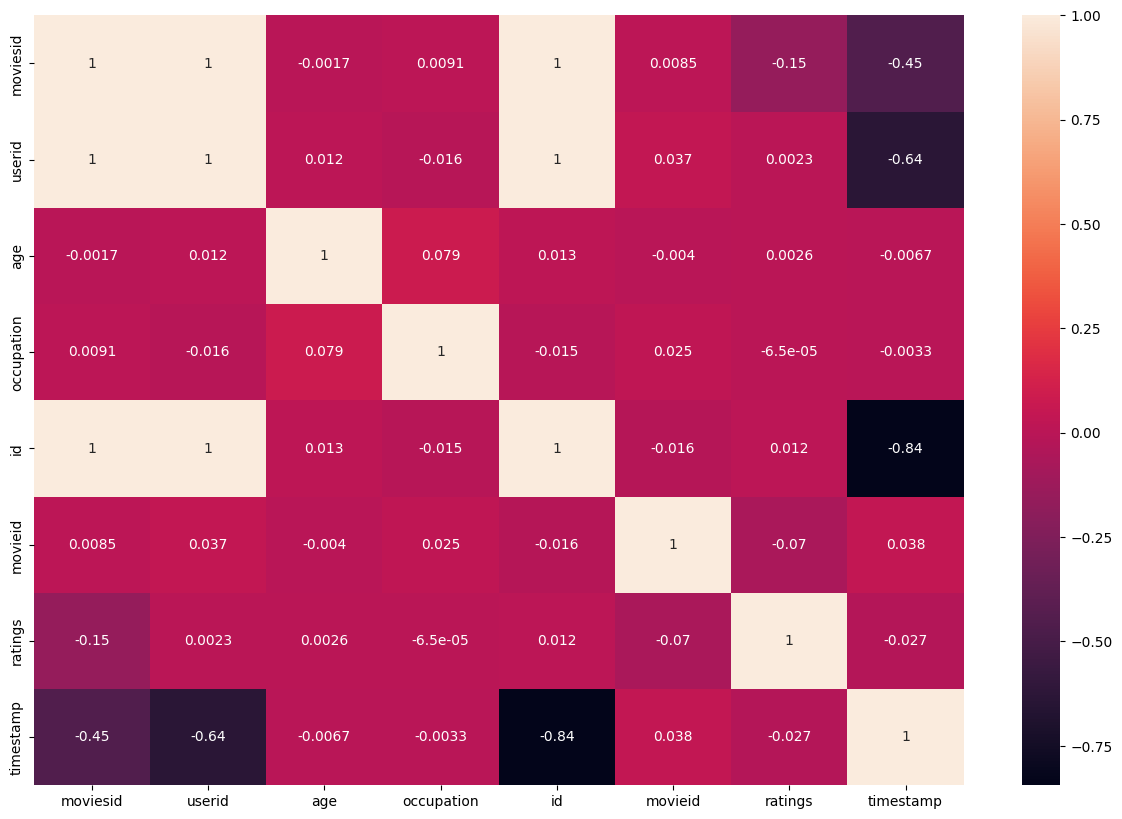

In [ ]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [ ]:
df.isnull().sum()

moviesid      996326
moviename     996326
category      996326
userid        994169
gender        994169
age           994169
occupation    994169
zip-code      994169
id                 0
movieid            0
ratings            0
timestamp          0
dtype: int64

<Axes: xlabel='ratings', ylabel='count'>

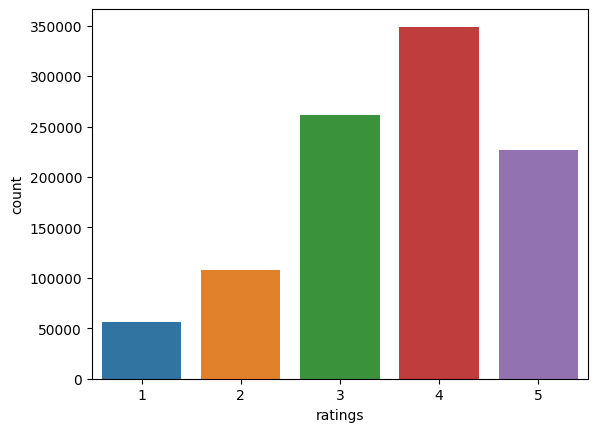

In [ ]:
sns.countplot(data=df,x='ratings')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(3883, 12)

<Axes: xlabel='ratings', ylabel='count'>

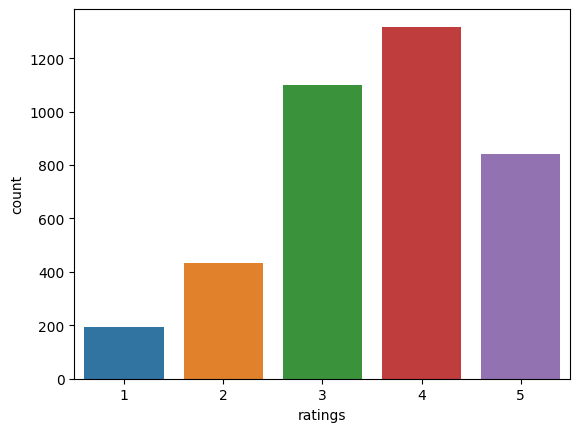

In [ ]:
sns.countplot(data=df,x='ratings')

In [ ]:
df.isnull().sum()

moviesid      0
moviename     0
category      0
userid        0
gender        0
age           0
occupation    0
zip-code      0
id            0
movieid       0
ratings       0
timestamp     0
dtype: int64

In [ ]:
df.dtypes

moviesid      float64
moviename      object
category       object
userid        float64
gender         object
age           float64
occupation    float64
zip-code       object
id              int64
movieid         int64
ratings         int64
timestamp       int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["moviename"] = le.fit_transform(df["moviename"])
df["category"] = le.fit_transform(df["category"])
df["gender"] = le.fit_transform(df["gender"])
df["zip-code"] = le.fit_transform(df["zip-code"])

In [ ]:
df.dtypes

moviesid      float64
moviename       int64
category        int64
userid        float64
gender          int64
age           float64
occupation    float64
zip-code        int64
id              int64
movieid         int64
ratings         int64
timestamp       int64
dtype: object

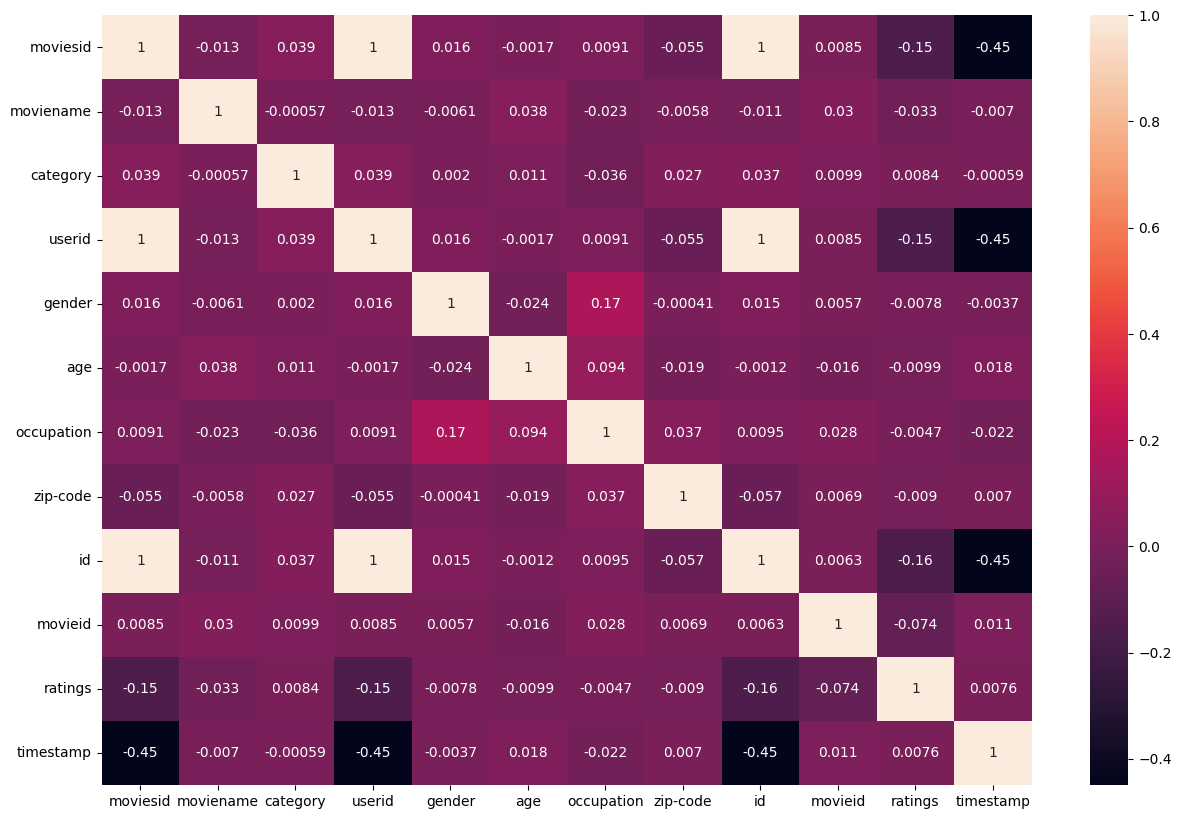

In [ ]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [ ]:
X = df.drop(["ratings"], axis = 1)
y = df["ratings"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3106, 11) (3106,)
(777, 11) (777,)


In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

[]

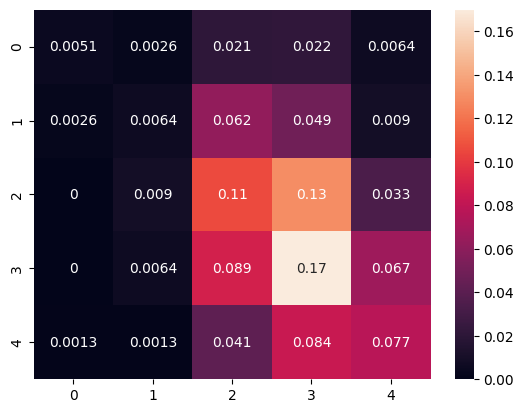

In [ ]:
pred1 = rf.predict(x_test)
cn = confusion_matrix(y_test, pred1)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()

In [ ]:
score = rf.score(x_test,pred1)
print('Acccuracy: ',score)

Acccuracy:  1.0


In [ ]:
print(classification_report (y_test,pred1))

              precision    recall  f1-score   support

           1       0.57      0.09      0.16        44
           2       0.25      0.05      0.08       100
           3       0.33      0.38      0.35       216
           4       0.37      0.51      0.43       258
           5       0.40      0.38      0.39       159

    accuracy                           0.36       777
   macro avg       0.39      0.28      0.28       777
weighted avg       0.36      0.36      0.34       777



In [ ]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
pred = model.predict(x_test)

[]

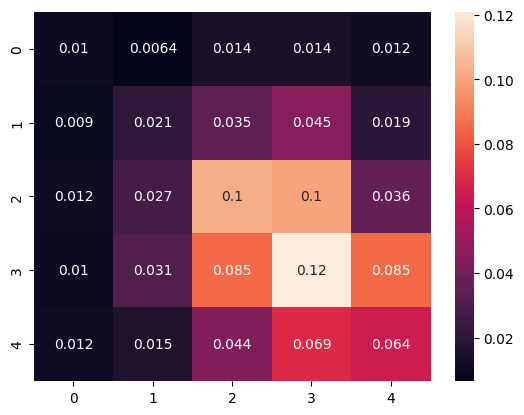

In [ ]:
cn = confusion_matrix(y_test, pred)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()

In [ ]:
score = model.score(x_test,pred)
print('Acccuracy: ',score)

Acccuracy:  1.0


In [ ]:
print(classification_report (y_test,pred))

              precision    recall  f1-score   support

           1       0.20      0.18      0.19        44
           2       0.21      0.16      0.18       100
           3       0.37      0.37      0.37       216
           4       0.35      0.36      0.35       258
           5       0.30      0.31      0.31       159

    accuracy                           0.32       777
   macro avg       0.28      0.28      0.28       777
weighted avg       0.32      0.32      0.32       777

